<a href="https://colab.research.google.com/github/FelipeVillegasH/Tareas_Coding_Dojo_Track2/blob/main/Classification_Metrics_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics
## By Felipe Villegas
### Drescription: Clasification Metrics(Sensitivity, Specificity, ROC Curve) of the logistic regression model and the selection of the best Hyperparameters using GridSearchCV

In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
df= pd.read_csv('/content/drive/MyDrive/CodingDojo/Track 2/Semana 7/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [77]:
df.isna().sum()
# no need of data base cleaning

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
y_yes                  0
dtype: int64

In [78]:
X = df.drop(columns = 'y_yes')
y = df['y_yes']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 3,
                                                    stratify = y)

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
# we define the params to be tested in the loop of cross validation by using the GridsearchCV library which applies the concept of the Gradient Descent
Params = {'penalty' : ['l1', 'l2'],
          'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
          'class_weight' : [None, 'balanced|']}
# Gradient Descent: 
# We can find the best alpha value and best regularization using this method. Gradient descent is an iterative optimization algorithm
# used in machine learning to minimize a loss function. The loss function describes how well the model will perform given the current
# set of parameters (weights and biases), and gradient descent is used to find the best set of parameters.
# from: https://medium.com/analytics-vidhya/hyperparameter-tuning-in-linear-regression-e0e0f1f968a1

In [82]:
# the default solver in logistic regression does not support the l2 penality, therefore we need to change it to liblinear
log_reg = LogisticRegression(solver = 'liblinear')

In [83]:
gs = GridSearchCV(log_reg, Params, cv = 5)
gs.fit(X_train, y_train)
gs.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1541, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1150, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_, y=y)
  File

{'C': 10, 'class_weight': None, 'penalty': 'l1'}

In [84]:
gs.score(X_train, y_train)

0.8896755162241888

In [85]:
gs.score(X_test, y_test)
# the model isn't over nor under fitted thus the difference between the train and test scores are minimal. 
# Therefore we can conclude that the did a good job on regularizing the model by selecting the hyperparameters with the GridSearchCV

0.8912466843501327

In [95]:
Preds = gs.predict(X_test)
Preds

array([0, 0, 1, ..., 0, 0, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


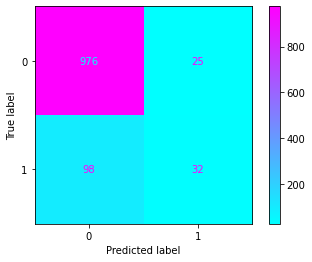

In [87]:
plot_confusion_matrix(gs,
                      X_test,
                      y_test,
                      cmap = 'cool'
                      );

In [88]:
# we assign the confusion matrix values to its avreviations in order to calculate the Specificity and sensitivity of the model
tn, fp, fn, tp = confusion_matrix(y_test, Preds).ravel()

In [89]:
Sensitivity = tp / (tp + fn)
print(Sensitivity)
# Our model correctly predicts 24.5% of the values to be true or 1 
# Which means that 24.6% of the possible clients contacted by phone are going to subscribe

0.24615384615384617


In [90]:
Specificity = tn / (tn + fp)
print(Specificity)
# Our model correctly predicts 24.5% of the values to be False or cero

0.975024975024975


In [94]:
print(f'Training AUC: {roc_auc_score(y_train, gs.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, gs.predict_proba(X_test)[:,1])}')

Training AUC: 0.8656730419091103
Testing AUC: 0.8537155152539768


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


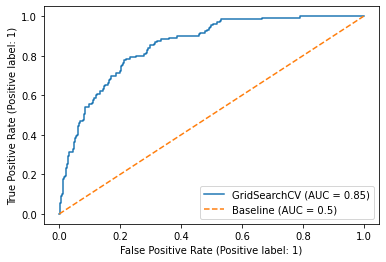

In [92]:
plot_roc_curve(gs, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();
# By analysing the AUC Curve we can affirm that the perfornmance of the positive rate regarding the true positive Rate is approximatelly 50%
# According to the graphic